In [38]:
import glob
from obspy.core import read

In [39]:
for file in glob.glob('*.z'):
    st = read(file)
    tr = st[0]
    msg = "%s %s %f %f" %(tr.stats.station, str(tr.stats.startime),
                          tr.dame.mean(), tr.data.std())
    print(msg)

# Leer y manipular tiempos y horas

In [40]:
from obspy.core import UTCDateTime
UTCDateTime("2011-03-11T05:46:23.00000Z")
UTCDateTime(2012, 10, 7, 12, 15, 0) #año, mes, dia, hora, min, seg
UTCDateTime("2012-03-07T12:15:00+02:00") #cambiar zona horaria


2012-03-07T10:15:00.000000Z

In [41]:
UTCDateTime(59) # 59 segundos

1970-01-01T00:00:59.000000Z

### Acceder Atributos

In [42]:
time = UTCDateTime("2011-03-11T05:46:23.00Z")
time.year
time.month
time.hour
time.day
time.julday #calendario Juliano
time.timestamp #segundos
time.weekday #dia de la semana

4

## Manejar diferencias horarias

In [45]:
time = UTCDateTime("2011-03-11T05:46:23.00Z")
print (time + 3600) #Le sumo 3600 seg (1h)

2011-03-11T06:46:23.000000Z


In [48]:
time2 = UTCDateTime(2011, 1, 1)
print (time - time2) #Diferencia en segundos

5982383.0


## Ejercicios de emplo

**Ejercicio 1**: Calucular el número de horas que pasaron desde tu fecha de nacimiento

In [85]:
AlejoRubio = UTCDateTime("1998-03-04")
today = UTCDateTime()-(3600*5) #hora actual cuando se ejecuta el codigo combertida de UTC 0 a UTC +5

In [83]:
answersecs = (today - AlejoRubio) #respuesta en secs
answerhours = (answersecs)/3600 #respuesta en horas
answeryears = (answerhours/(24*365)) #respuesta en años

**Ejercicio 2**: obtener una lista de 10 UTC DateTimes, empezando ayer a las 10:00 con un espaciado de 90 minutos

In [136]:
ti =  UTCDateTime()-(3600*5)-(3600*24)
ti.hour = 10
ti.minute = 0
ti.second = 00
ti

2024-02-24T10:00:00.701347Z

In [138]:
list = [ti]

for i in range(1,10,1):
    ti = ti+(90*60)
    list.append(ti)

#list  

# Leer Sismogramas

Se pueden leer archivos en los formatos más comunes de la sismología, como MiniSEED, SAC, GSE, SEISAN, CSS, y muchos otros.\
Para leer un archivo la función read() de la clase obspy.core.stream.Stream. Esta función devuelve un objeto Stream que contiene uno o más objetos Trace.\
Cada objeto Trace contiene la información de una canal de una estación sismólogica.

In [141]:
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

In [142]:
print(st) #solo hay una traza

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [145]:
len(st)
tr = st[0] #acceder a la primera traza


.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

In [149]:
#Acceder a los metadatos de la traza
tr.stats

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})

In [150]:
tr.data #amplitudes de la traza

array([-38,  12,  -4, ..., -14,  -3,  -9])

In [151]:
tr.data[0:3] #3 primeras amplitudes

array([-38,  12,  -4])

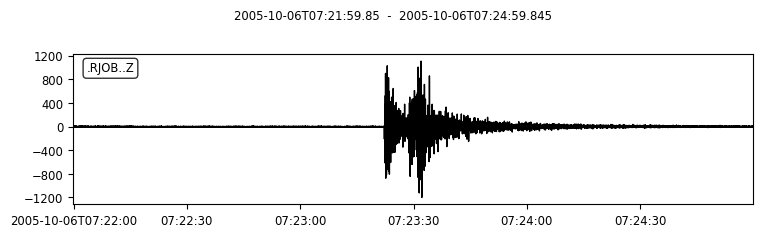

In [159]:
seismogram_1 = tr.plot() # o st.plot()

## Visualización del sismograma

In [161]:
single_channel = read("https://examples.obspy.org/COP.BHZ.DK.2009.050")

print(single_channel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


In [181]:
# Stream con tres trazas
three_channels = read("https://examples.obspy.org/COP.BHZ.DK.2009.050")
three_channels += read("https://examples.obspy.org/COP.BHE.DK.2009.050")
three_channels += read("https://examples.obspy.org/COP.BHN.DK.2009.050")
three_channels

3 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples

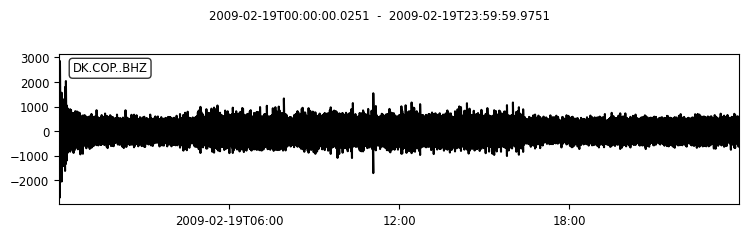

In [167]:
single_channel_seis = single_channel.plot()

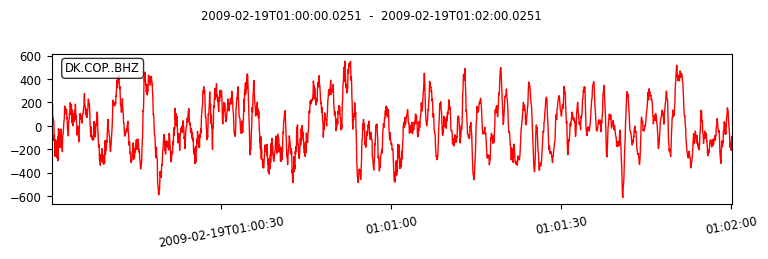

In [178]:
dt = single_channel[0].stats.starttime
single_channel_crop = single_channel.plot(color='red', tick_rotation=10, tick_format='%I:%M %p',
                                          starttime=dt+60*60, endtime=dt+60*60+120)

In [ ]:
# Guarda la imagen en el directorio actual
single_channel.plot(outfile='single_channel.png')

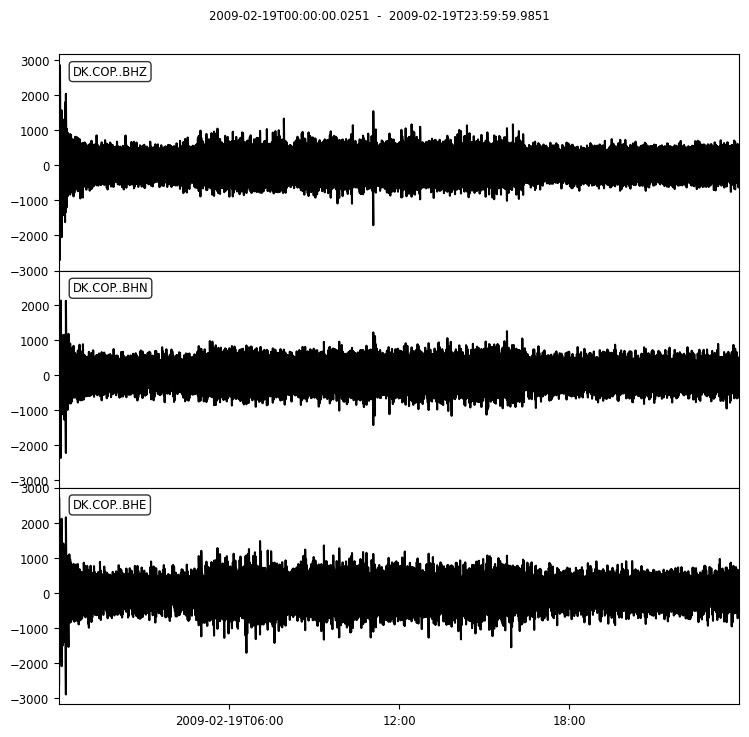

In [182]:
three_channels_seis = three_channels.plot()

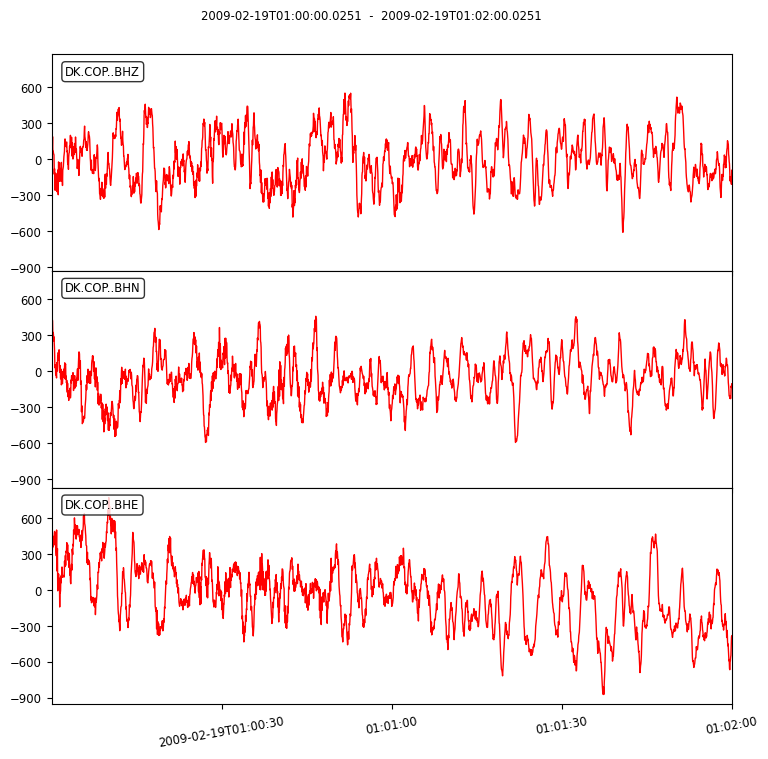

In [183]:

three_channels_crop = three_channels.plot(color='red', tick_rotation=10, tick_format='%I:%M %p',
                                          starttime=dt+60*60, endtime=dt+60*60+120)

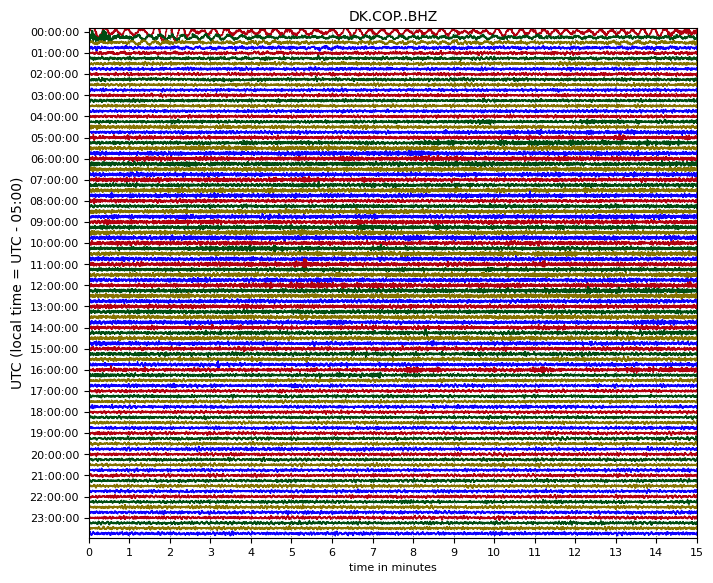

In [184]:
dayplot_single = single_channel.plot(type='dayplot')

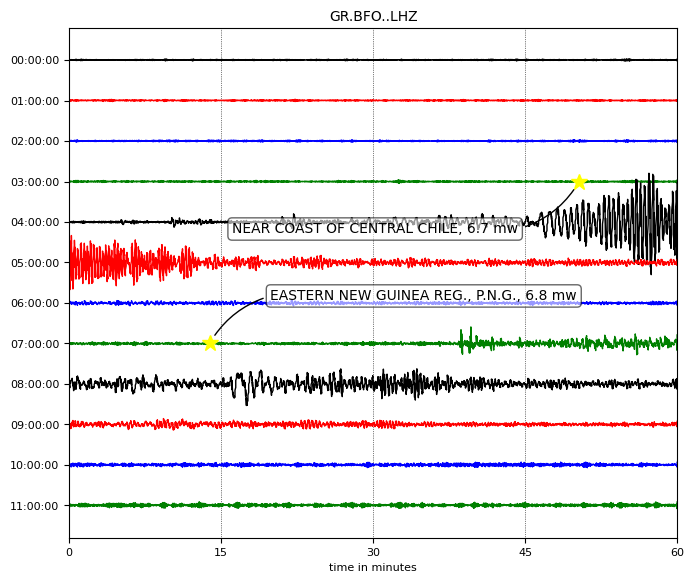

In [185]:
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2)
event_plot = st.plot(type="dayplot", interval=60, right_vertical_labels=False,
                     vertical_scalling_range=5e3, one_tick_per_line=True,
                     color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
                     events={'min_magnitude': 6.5})

<function matplotlib.pyplot.show(close=None, block=None)>

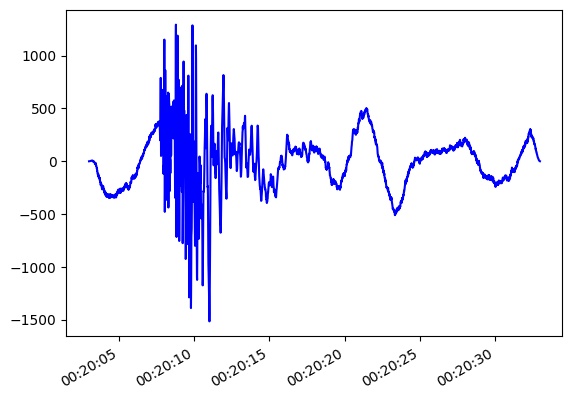

In [190]:
#Sismogramas usando matplotlib

import matplotlib.pyplot as plt

st = read()
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show